In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV
from statsmodels.api import OLS,add_constant
from sklearn.model_selection import train_test_split
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [87]:
df = pd.read_csv('/content/drive/My Drive/Data/insurance.csv')

In [88]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


**Investigating Data**

In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,12110.011240
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4740.287500
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.915000


### **Cleaning and Transforming Data**

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

***No null values***

In [9]:
df.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [10]:
df.children.unique()

array([0, 1, 3, 2, 5, 4])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


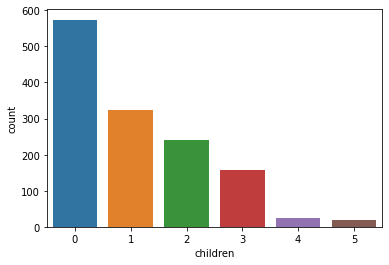

In [11]:
#Children column looks more like a categorical column than a numerical column

sns.countplot(df.children)

In [12]:
#Percentage of values in children column
df.children.value_counts(1)*100

0    42.899851
1    24.215247
2    17.937220
3    11.733931
4     1.868460
5     1.345291
Name: children, dtype: float64

In [13]:
df.children = df.children.astype('object')

In [14]:
dfcat = df.select_dtypes(include='object')
dfnum = df.select_dtypes(exclude='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


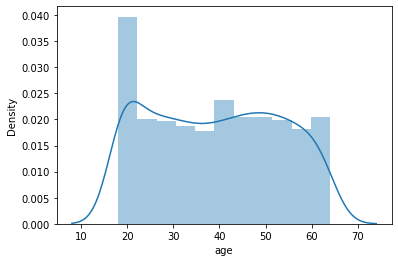

In [15]:
sns.distplot(dfnum.age)

In [16]:
dfnum.age.skew()

0.05567251565299186

In [17]:
dfnum.age.kurtosis()

-1.2450876526418673

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


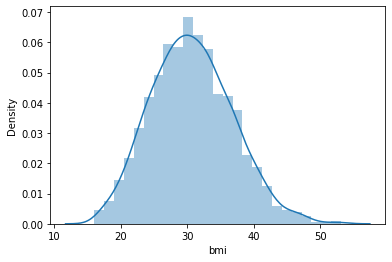

In [18]:
sns.distplot(dfnum['bmi'])

In [19]:
dfnum.bmi.skew()

0.28459296016731195

In [20]:
dfnum.bmi.kurtosis()

-0.05337020602503051

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


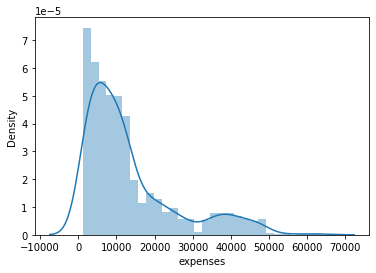

In [21]:
sns.distplot(dfnum.expenses)

In [22]:
dfnum.expenses.skew()

1.51587966289798

Age and expenses columns are Highly skewed while BMI looks nearly normal.

**Outlier Removal using IQR**

In [23]:
q1 = dfnum.quantile(0.25)
q3 = dfnum.quantile(0.75)
IQR = q3-q1
IQR

age            24.0000
bmi             8.4000
expenses    11899.6275
dtype: float64

In [24]:
(((dfnum < q1 - 1.5*IQR) | (dfnum > q3 + 1.5*IQR)).sum()/df.shape[0])*100

age          0.000000
bmi          0.672646
expenses    10.388640
dtype: float64

10% of the expenses are outliers.

**Checking for duplicates**

In [25]:
df.duplicated().sum()

1

In [89]:
df = df.drop_duplicates()

In [27]:
df.duplicated().sum()

0

In [28]:
dfcat = df.select_dtypes(include='object')
dfnum = df.select_dtypes(exclude='object')

### **Data Visualizations**

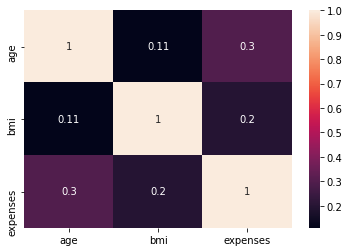

In [29]:
sns.heatmap(dfnum.corr(),annot=True)

Text(0, 0.5, 'count')

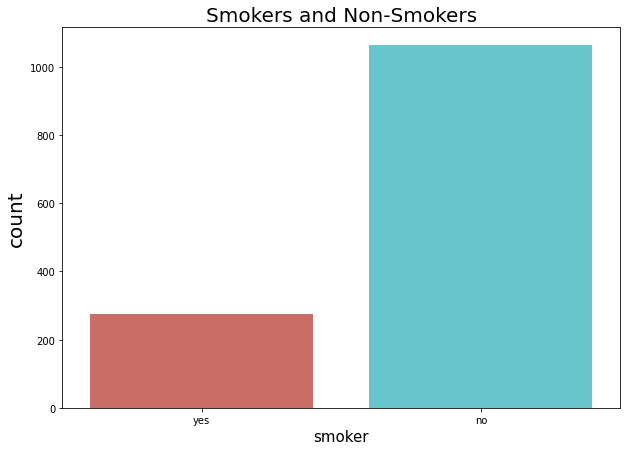

In [30]:
plt.figure(figsize = (10,7))
g = sns.countplot(x="smoker",data=df,palette='hls')
g.set_title("Smokers and Non-Smokers", fontsize=20)
g.set_xlabel("smoker", fontsize=15)
g.set_ylabel("count", fontsize=20)

Text(0, 0.5, 'count')

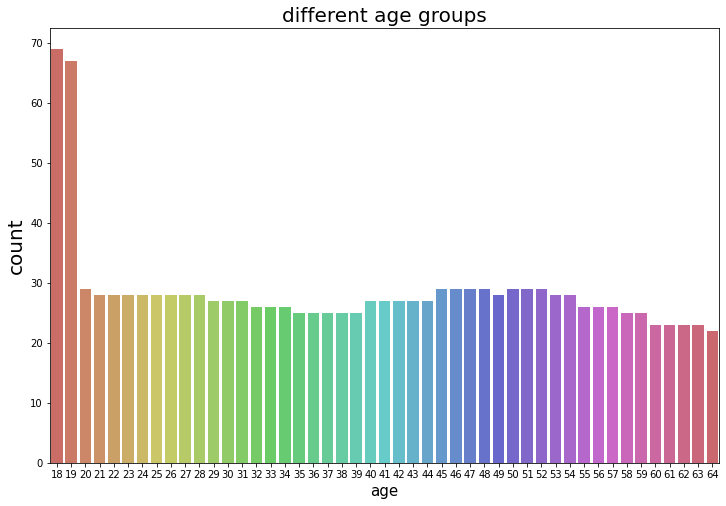

In [31]:
plt.figure(figsize = (12,8))
g = sns.countplot(x="age",data=df,palette='hls')
g.set_title("different age groups", fontsize=20)
g.set_xlabel("age", fontsize=15)
g.set_ylabel("count", fontsize=20)

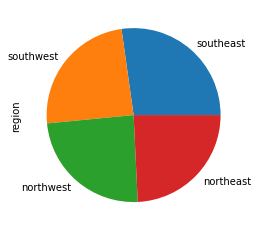

In [32]:
df.region.value_counts().plot(kind="pie")

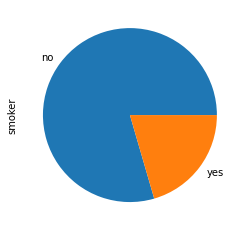

In [33]:
df.smoker.value_counts().plot(kind="pie")

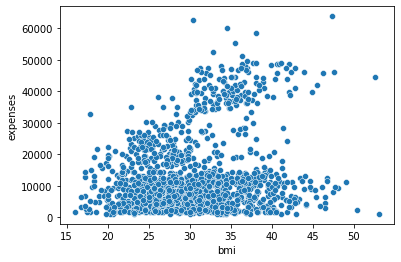

In [34]:
sns.scatterplot(x=df['bmi'], y=df['expenses'])

The scatterplot above suggests that body mass index (BMI) and expenses are positively correlated, where customers with higher BMI typically also tend to pay more in insurance premium (This pattern makes sense, since high BMI is typically associated with higher risk of chronic disease.)

To double-check the strength of this relationship we will add a regression line, or the line that best fits the data. We do this by changing the command to sns.regplot.

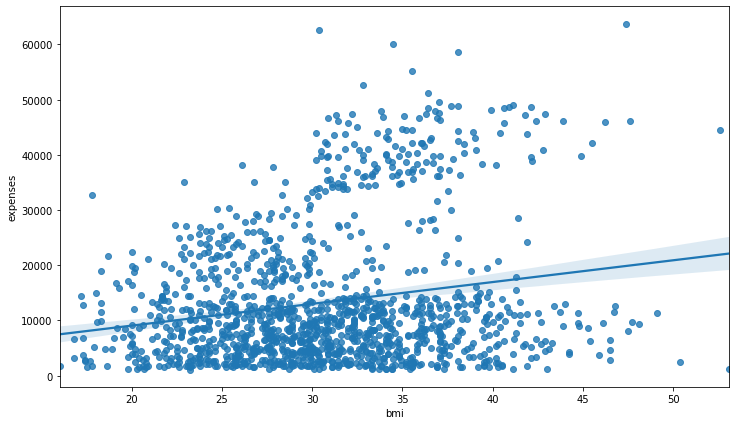

In [35]:
plt.figure(figsize=(12, 7))
sns.regplot(x=df['bmi'], y=df['expenses'])

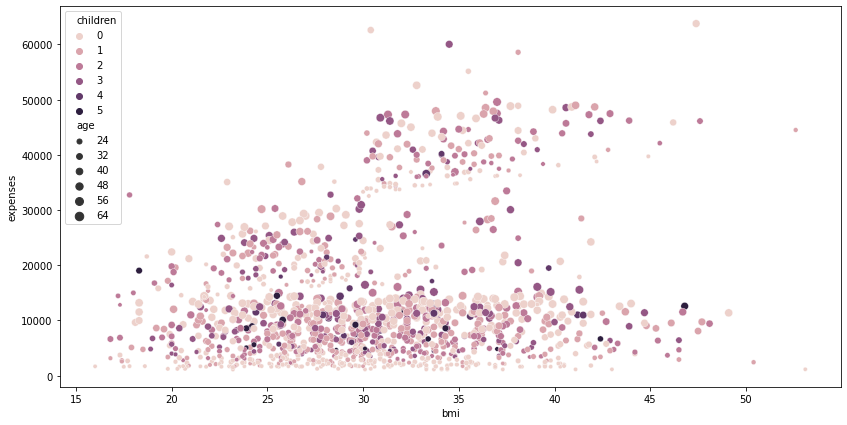

In [36]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['bmi'], y=df['expenses'],hue=df['children'],size=df['age'])

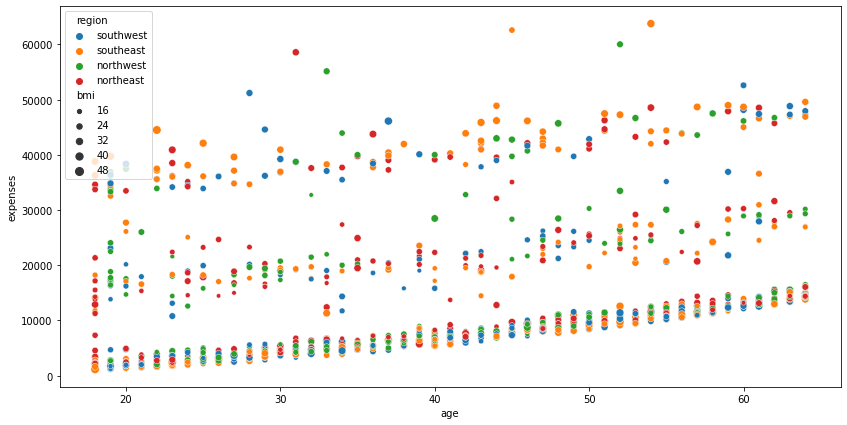

In [37]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['age'], y=df['expenses'],hue=df['region'],size=df['bmi'])

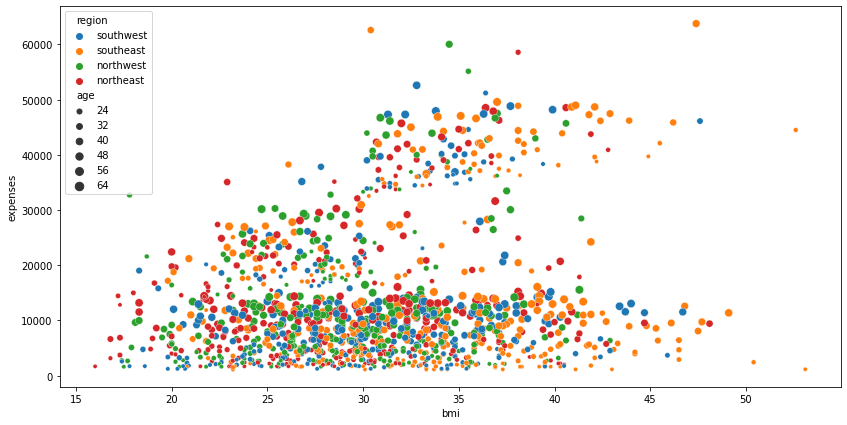

In [38]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['bmi'], y=df['expenses'],hue=df['region'],size=df['age'])

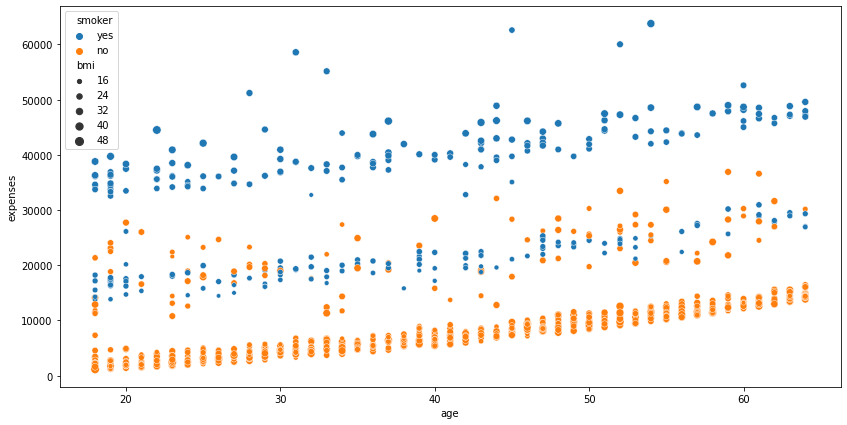

In [39]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['age'], y=df['expenses'],hue=df['smoker'],size=df['bmi'])

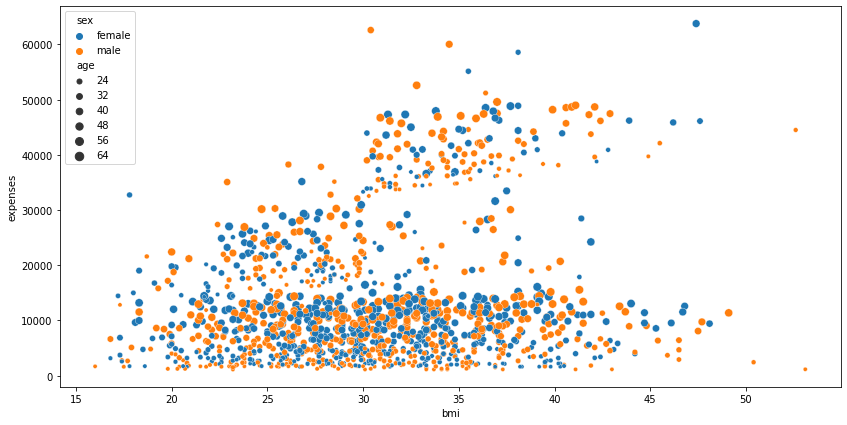

In [40]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['bmi'], y=df['expenses'],hue=df['sex'],size=df['age'])

In [ ]:
#sns.pairplot(data=df,hue='sex')

#sns.pairplot(data=df,hue='smoker')

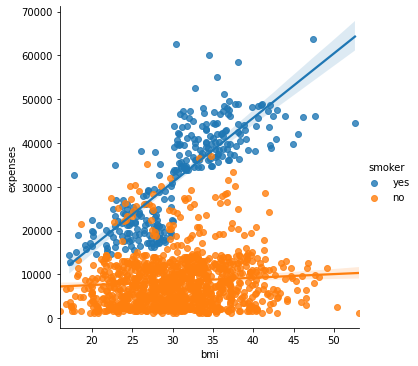

In [42]:
sns.lmplot(x="bmi", y="expenses", hue="smoker", data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


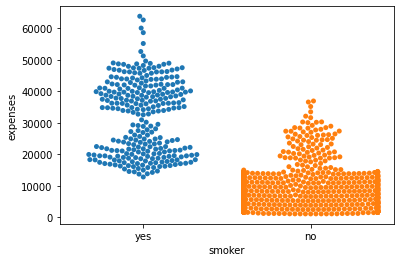

In [43]:
sns.swarmplot(x=df['smoker'],y=df['expenses'])

The Swarm plot shows us that: on average, non-smokers are charged less than smokers, and the customers who pay the most are smokers; whereas the customers who pay the least are non-smokers.

Changing children back to int.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   object 
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 123.6+ KB


In [90]:
df.children = df.children.astype(int)

In [98]:
one_hot=pd.get_dummies(df.select_dtypes(include='object'),drop_first=True)
one_hot.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [100]:
#one-hot encoding
df_final = pd.concat([df.select_dtypes(exclude='object'),one_hot],axis=1)
df_final.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0


In [48]:
#label encoding
df_label=df
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in ['sex','smoker','region']:
    df_label[i] = label_encoder.fit_transform(df_label[i])
df_label.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
5,31,0,25.7,0,0,2,3756.62
6,46,0,33.4,1,0,2,8240.59
7,37,0,27.7,3,0,1,7281.51
8,37,1,29.8,2,0,0,6406.41
9,60,0,25.8,0,0,1,28923.14


In [101]:
#Using One-hot dataframe
y = df_final['expenses']
x = df_final.drop('expenses',axis=1)

### **Model Building**

In [102]:
xc = add_constant(x)
xtrain,xtest,ytrain,ytest = train_test_split(xc,y,test_size=0.3,random_state=0)

In [103]:
model = OLS(ytrain,xtrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     333.7
Date:                Mon, 29 Mar 2021   Prob (F-statistic):          1.18e-266
Time:                        10:40:20   Log-Likelihood:                -9458.1
No. Observations:                 935   AIC:                         1.893e+04
Df Residuals:                     926   BIC:                         1.898e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.016e+04   1188.993     -8.549      0.000   -1.25e+04   -7831.187
age                243.0348     14.136     17.192      0.000     215.292     270.777
bmi                295.5752     33.913      8.716      0.000     229.021     362.130
children           472.5945    161.764      2.921      0.004     155.127     790.062
sex_male           -82.6598    394.487     -0.210      0.834    -856.852     691.532
smoker_yes        2.362e+04    493.442     47.862      0.000    2.26e+04    2.46e+04
region_northwest  -566.6400    570.374     -0.993      0.321   -1686.016     552.736
region_southeast  -812.2938    574.110     -1.415      0.157   -1939.001     314.413
region_southwest -1258.2293    564.855     -2.228      0.026   -2366.775    -149.684
==============================================================================
Omnibus:                      246.262   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              684.054
Skew:                           1.330   Prob(JB):                    2.88e-149
Kurtosis:                       6.238   Cond. No.                         317.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
#Using Label data
y2 = df_label['expenses']
x2 = df_label.drop('expenses',axis=1)
xc2 = add_constant(x2)

In [77]:
xtrain,xtest,ytrain,ytest = train_test_split(xc2,y2,test_size=0.3,random_state=0)

In [78]:
model1 = OLS(ytrain,xtrain).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     445.8
Date:                Mon, 29 Mar 2021   Prob (F-statistic):          2.79e-269
Time:                        10:31:01   Log-Likelihood:                -9458.2
No. Observations:                 935   AIC:                         1.893e+04
Df Residuals:                     928   BIC:                         1.896e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.026e+04   1146.711     -8.950      0.000   -1.25e+04   -8013.124
age          242.9403     14.117     17.209      0.000     215.235     270.646
sex          -82.1385    394.080     -0.208      0.835    -855.531     691.254
bmi          297.1485     32.758      9.071      0.000     232.860     361.438
children     471.0059    161.316      2.920      0.004     154.420     787.592
smoker      2.362e+04    491.547     48.062      0.000    2.27e+04    2.46e+04
region      -402.5318    179.687     -2.240      0.025    -755.171     -49.893
==============================================================================
Omnibus:                      246.061   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              682.359
Skew:                           1.329   Prob(JB):                    6.72e-149
Kurtosis:                       6.232   Cond. No.                         302.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Both models are performing equally.

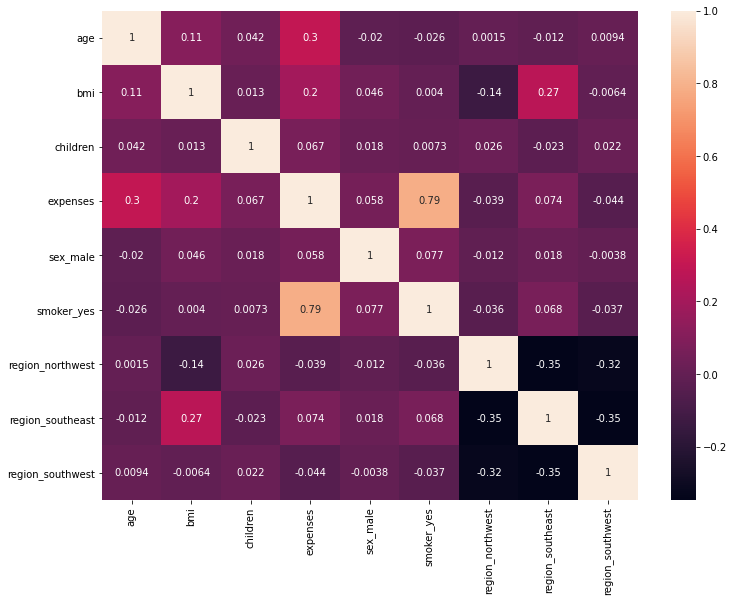

In [104]:
plt.figure(figsize=[12,9])
sns.heatmap(df_final.corr(),annot=True)

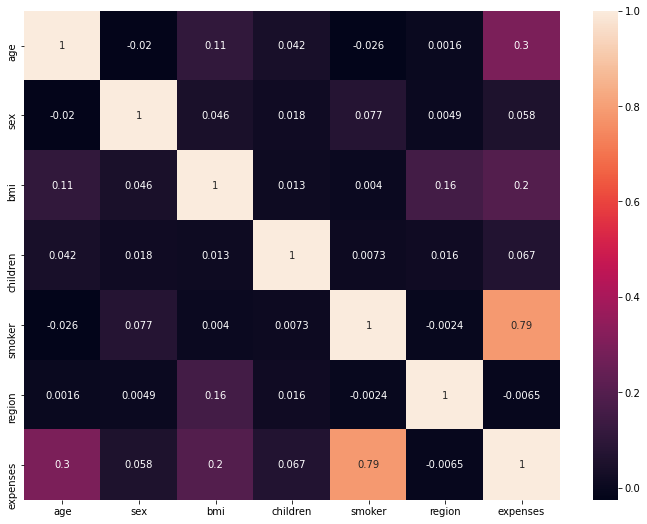

In [105]:
plt.figure(figsize=[12,9])
sns.heatmap(df_label.corr(),annot=True)

In [108]:
abs(df_final.corr().expenses).sort_values()

region_northwest    0.038695
region_southwest    0.043637
sex_male            0.058045
children            0.067389
region_southeast    0.073578
bmi                 0.198637
age                 0.298308
smoker_yes          0.787234
expenses            1.000000
Name: expenses, dtype: float64

In [109]:
#Using One-hot dataframe for further models
y = df_final['expenses']
x = df_final.drop('expenses',axis=1)

In [110]:
pd.Series([variance_inflation_factor(x.values, i) for i in range(len(x.columns))],index=x.columns).sort_values(ascending=False)

bmi                 11.360542
age                  7.697595
region_southeast     2.265611
sex_male             2.001958
region_southwest     1.960617
region_northwest     1.888000
children             1.810929
smoker_yes           1.261510
dtype: float64

In [111]:
x1 = x.drop('bmi',axis=1)
pd.Series([variance_inflation_factor(x1.values, i) for i in range(len(x1.columns))],index=x1.columns).sort_values(ascending=False)

age                 3.852633
sex_male            1.884591
region_southeast    1.796145
children            1.763406
region_southwest    1.715465
region_northwest    1.706703
smoker_yes          1.249948
dtype: float64

In [113]:
xc = add_constant(x1)
xtrain,xtest,ytrain,ytest = train_test_split(xc,y,test_size=0.3,random_state=0)

In [114]:
model = OLS(ytrain,xtrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     342.8
Date:                Mon, 29 Mar 2021   Prob (F-statistic):          4.02e-252
Time:                        10:46:18   Log-Likelihood:                -9495.0
No. Observations:                 935   AIC:                         1.901e+04
Df Residuals:                     927   BIC:                         1.904e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2068.0015    771.541     -2.680      0.007   -3582.170    -553.833
age                256.7884     14.605     17.583      0.000     228.126     285.451
children           481.0616    168.175      2.860      0.004     151.014     811.109
sex_male            -5.0777    410.023     -0.012      0.990    -809.759     799.604
smoker_yes        2.345e+04    512.613     45.743      0.000    2.24e+04    2.45e+04
region_northwest  -585.3609    592.984     -0.987      0.324   -1749.108     578.387
region_southeast   484.8180    576.469      0.841      0.401    -646.518    1616.154
region_southwest  -809.6276    584.808     -1.384      0.167   -1957.329     338.073
==============================================================================
Omnibus:                      223.337   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              630.374
Skew:                           1.199   Prob(JB):                    1.31e-137
Kurtosis:                       6.230   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No improvement. We will use x now with different algorithms.

In [121]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=0)
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [122]:
# Print Model intercept and co-efficent
print("Model intercept",model.intercept_)
cdf = pd.DataFrame(data=model.coef_.T, index=x.columns, columns=["Coefficients"])
cdf

Model intercept -10164.621121952874


,Coefficients
age,243.034849
bmi,295.575233
children,472.594471
sex_male,-82.659821
smoker_yes,23617.178068
region_northwest,-566.640023
region_southeast,-812.293804
region_southwest,-1258.229275


In [123]:
# Print various metrics

print("Predicting the train data")
train_predict = model.predict(xtrain)
print("Predicting the test data")
test_predict = model.predict(xtest)
print("MAE")
print("Train : ",metrics.mean_absolute_error(ytrain,train_predict))
print("Test  : ",metrics.mean_absolute_error(ytest,test_predict))
print("====================================")
print("MSE")
print("Train : ",metrics.mean_squared_error(ytrain,train_predict))
print("Test  : ",metrics.mean_squared_error(ytest,test_predict))
print("====================================")
print("RMSE")
print("Train : ",np.sqrt(metrics.mean_squared_error(ytrain,train_predict)))
print("Test  : ",np.sqrt(metrics.mean_squared_error(ytest,test_predict)))
print("====================================")
print("R^2")
print("Train : ",metrics.r2_score(ytrain,train_predict))
print("Test  : ",metrics.r2_score(ytest,test_predict))
print("MAPE")
print("Train : ",np.mean(np.abs((ytrain - train_predict) / ytrain)) * 100)
print("Test  : ",np.mean(np.abs((ytest - test_predict) / ytest)) * 100)

Predicting the train data
Predicting the test data
MAE
Train :  4014.1912906824823
Test  :  4241.108895269088
MSE
Train :  35799597.13120593
Test  :  38830471.95646139
RMSE
Train :  5983.276454519374
Test  :  6231.410109795486
R^2
Train :  0.7424427969820437
Test  :  0.7628811801298232
MAPE
Train :  40.006687053872625
Test  :  39.34358886091349


In [125]:
model = RidgeCV()
model.fit(xtrain,ytrain)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [126]:
# Print various metrics

print("Predicting the train data")
train_predict = model.predict(xtrain)
print("Predicting the test data")
test_predict = model.predict(xtest)
print("MAE")
print("Train : ",metrics.mean_absolute_error(ytrain,train_predict))
print("Test  : ",metrics.mean_absolute_error(ytest,test_predict))
print("====================================")
print("MSE")
print("Train : ",metrics.mean_squared_error(ytrain,train_predict))
print("Test  : ",metrics.mean_squared_error(ytest,test_predict))
print("====================================")
print("RMSE")
print("Train : ",np.sqrt(metrics.mean_squared_error(ytrain,train_predict)))
print("Test  : ",np.sqrt(metrics.mean_squared_error(ytest,test_predict)))
print("====================================")
print("R^2")
print("Train : ",metrics.r2_score(ytrain,train_predict))
print("Test  : ",metrics.r2_score(ytest,test_predict))
print("MAPE")
print("Train : ",np.mean(np.abs((ytrain - train_predict) / ytrain)) * 100)
print("Test  : ",np.mean(np.abs((ytest - test_predict) / ytest)) * 100)

Predicting the train data
Predicting the test data
MAE
Train :  4015.2002579943414
Test  :  4242.375506586208
MSE
Train :  35799637.557381876
Test  :  38834689.52251043
RMSE
Train :  5983.279832782508
Test  :  6231.748512457032
R^2
Train :  0.742442506139307
Test  :  0.7628554255037812
MAPE
Train :  40.026531960950905
Test  :  39.36417092939042


In [127]:
model = LassoCV()
model.fit(xtrain,ytrain)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [128]:
# Print various metrics

print("Predicting the train data")
train_predict = model.predict(xtrain)
print("Predicting the test data")
test_predict = model.predict(xtest)
print("MAE")
print("Train : ",metrics.mean_absolute_error(ytrain,train_predict))
print("Test  : ",metrics.mean_absolute_error(ytest,test_predict))
print("====================================")
print("MSE")
print("Train : ",metrics.mean_squared_error(ytrain,train_predict))
print("Test  : ",metrics.mean_squared_error(ytest,test_predict))
print("====================================")
print("RMSE")
print("Train : ",np.sqrt(metrics.mean_squared_error(ytrain,train_predict)))
print("Test  : ",np.sqrt(metrics.mean_squared_error(ytest,test_predict)))
print("====================================")
print("R^2")
print("Train : ",metrics.r2_score(ytrain,train_predict))
print("Test  : ",metrics.r2_score(ytest,test_predict))
print("MAPE")
print("Train : ",np.mean(np.abs((ytrain - train_predict) / ytrain)) * 100)
print("Test  : ",np.mean(np.abs((ytest - test_predict) / ytest)) * 100)

Predicting the train data
Predicting the test data
MAE
Train :  4039.6075670139885
Test  :  4257.494605643122
MSE
Train :  35917633.50546443
Test  :  39038551.23414304
RMSE
Train :  5993.13219489312
Test  :  6248.083804987177
R^2
Train :  0.741593594174063
Test  :  0.7616105411116152
MAPE
Train :  40.61496415890126
Test  :  39.859703269587776


In [148]:
#Trying removing less correlated features

x1 = x.drop(['region_northwest','region_southeast','region_southwest','sex_male'],axis=1)
x1.head()

,age,bmi,children,smoker_yes
0,19,27.9,0,1
1,18,33.8,1,0
2,28,33.0,3,0
3,33,22.7,0,0
4,32,28.9,0,0


In [149]:
xtrain,xtest,ytrain,ytest = train_test_split(x1,y,test_size=0.3,random_state=0)
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [150]:
# Print various metrics

print("Linear Regression with less features")
print("Predicting the train data")
train_predict = model.predict(xtrain)
print("Predicting the test data")
test_predict = model.predict(xtest)
print("MAE")
print("Train : ",metrics.mean_absolute_error(ytrain,train_predict))
print("Test  : ",metrics.mean_absolute_error(ytest,test_predict))
print("====================================")
print("MSE")
print("Train : ",metrics.mean_squared_error(ytrain,train_predict))
print("Test  : ",metrics.mean_squared_error(ytest,test_predict))
print("====================================")
print("RMSE")
print("Train : ",np.sqrt(metrics.mean_squared_error(ytrain,train_predict)))
print("Test  : ",np.sqrt(metrics.mean_squared_error(ytest,test_predict)))
print("====================================")
print("R^2")
print("Train : ",metrics.r2_score(ytrain,train_predict))
print("Test  : ",metrics.r2_score(ytest,test_predict))
print("MAPE")
print("Train : ",np.mean(np.abs((ytrain - train_predict) / ytrain)) * 100)
print("Test  : ",np.mean(np.abs((ytest - test_predict) / ytest)) * 100)

Linear Regression with less features
Predicting the train data
Predicting the test data
MAE
Train :  4025.262654417341
Test  :  4221.3210455918415
MSE
Train :  35998373.95414574
Test  :  38835936.7489875
RMSE
Train :  5999.864494648669
Test  :  6231.84858200097
R^2
Train :  0.7410127137787738
Test  :  0.7628478092978621
MAPE
Train :  40.180052312612176
Test  :  38.98273498186329


In [151]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(xtrain)
X_test = sc.transform(xtest)

In [152]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5, random_state=13)  
model.fit(X_train, ytrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=13, splitter='best')

In [156]:
# Print various metrics

print("Decision Tree Regressor")
print("Predicting the train data")
train_predict = model.predict(X_train)
print("Predicting the test data")
test_predict = model.predict(X_test)
print("MAE")
print("Train : ",metrics.mean_absolute_error(ytrain,train_predict))
print("Test  : ",metrics.mean_absolute_error(ytest,test_predict))
print("====================================")
print("MSE")
print("Train : ",metrics.mean_squared_error(ytrain,train_predict))
print("Test  : ",metrics.mean_squared_error(ytest,test_predict))
print("====================================")
print("RMSE")
print("Train : ",np.sqrt(metrics.mean_squared_error(ytrain,train_predict)))
print("Test  : ",np.sqrt(metrics.mean_squared_error(ytest,test_predict)))
print("====================================")
print("R^2")
print("Train : ",metrics.r2_score(ytrain,train_predict))
print("Test  : ",metrics.r2_score(ytest,test_predict))
print("MAPE")
print("Train : ",np.mean(np.abs((ytrain - train_predict) / ytrain)) * 100)
print("Test  : ",np.mean(np.abs((ytest - test_predict) / ytest)) * 100)

Decision Tree Regressor
Predicting the train data
Predicting the test data
MAE
Train :  2132.8428947706802
Test  :  2717.8800801562065
MSE
Train :  15399577.021099033
Test  :  22786007.787886254
RMSE
Train :  3924.229481197428
Test  :  4773.469156482134
R^2
Train :  0.8892090329766164
Test  :  0.8608569248842934
MAPE
Train :  27.457334985094484
Test  :  31.883348732672516


In [161]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=20)  
model.fit(X_train, ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                    weights='uniform')

In [162]:
# Print various metrics

print("KNN Regressor")
print("Predicting the train data")
train_predict = model.predict(X_train)
print("Predicting the test data")
test_predict = model.predict(X_test)
print("MAE")
print("Train : ",metrics.mean_absolute_error(ytrain,train_predict))
print("Test  : ",metrics.mean_absolute_error(ytest,test_predict))
print("====================================")
print("MSE")
print("Train : ",metrics.mean_squared_error(ytrain,train_predict))
print("Test  : ",metrics.mean_squared_error(ytest,test_predict))
print("====================================")
print("RMSE")
print("Train : ",np.sqrt(metrics.mean_squared_error(ytrain,train_predict)))
print("Test  : ",np.sqrt(metrics.mean_squared_error(ytest,test_predict)))
print("====================================")
print("R^2")
print("Train : ",metrics.r2_score(ytrain,train_predict))
print("Test  : ",metrics.r2_score(ytest,test_predict))
print("MAPE")
print("Train : ",np.mean(np.abs((ytrain - train_predict) / ytrain)) * 100)
print("Test  : ",np.mean(np.abs((ytest - test_predict) / ytest)) * 100)

KNN Regressor
Predicting the train data
Predicting the test data
MAE
Train :  2719.071304812834
Test  :  2973.5682723880595
MSE
Train :  21912131.536005486
Test  :  24988798.72133874
RMSE
Train :  4681.03957855576
Test  :  4998.879746637114
R^2
Train :  0.842355005004912
Test  :  0.8474055512531247
MAPE
Train :  31.041556236766265
Test  :  34.23283800327514


In [163]:
from sklearn.ensemble import RandomForestRegressor  

model = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=13)  
model.fit(X_train, ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=13, verbose=0, warm_start=False)

In [164]:
# Print various metrics

print("Random_Forest_Regression")
print("Predicting the train data")
train_predict = model.predict(X_train)
print("Predicting the test data")
test_predict = model.predict(X_test)
print("MAE")
print("Train : ",metrics.mean_absolute_error(ytrain,train_predict))
print("Test  : ",metrics.mean_absolute_error(ytest,test_predict))
print("====================================")
print("MSE")
print("Train : ",metrics.mean_squared_error(ytrain,train_predict))
print("Test  : ",metrics.mean_squared_error(ytest,test_predict))
print("====================================")
print("RMSE")
print("Train : ",np.sqrt(metrics.mean_squared_error(ytrain,train_predict)))
print("Test  : ",np.sqrt(metrics.mean_squared_error(ytest,test_predict)))
print("====================================")
print("R^2")
print("Train : ",metrics.r2_score(ytrain,train_predict))
print("Test  : ",metrics.r2_score(ytest,test_predict))
print("MAPE")
print("Train : ",np.mean(np.abs((ytrain - train_predict) / ytrain)) * 100)
print("Test  : ",np.mean(np.abs((ytest - test_predict) / ytest)) * 100)

Random_Forest_Regression
Predicting the train data
Predicting the test data
MAE
Train :  2132.8428947706802
Test  :  2717.8800801562065
MSE
Train :  15399577.021099033
Test  :  22786007.787886254
RMSE
Train :  3924.229481197428
Test  :  4773.469156482134
R^2
Train :  0.8892090329766164
Test  :  0.8608569248842934
MAPE
Train :  27.457334985094484
Test  :  31.883348732672516


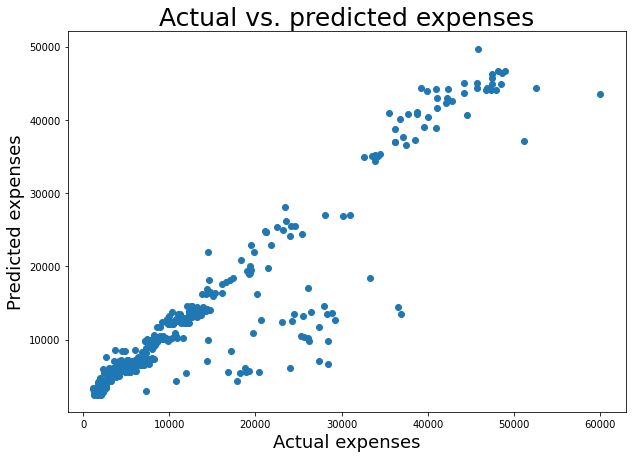

In [165]:
#Plot actual vs predicted value
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted expenses",fontsize=25)
plt.xlabel("Actual expenses",fontsize=18)
plt.ylabel("Predicted expenses", fontsize=18)
plt.scatter(x=ytest,y=test_predict)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


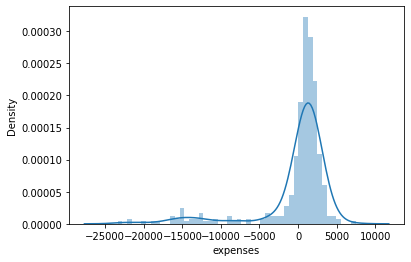

In [166]:
#Distribution of Residuals
sns.distplot(test_predict-ytest)

**Summary:**

Thus the best performing algorithms are non linear - Decision Tree and Random Forest with an accuracy of 86% on the test data.